## Part 1

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [5]:
class future_price_simulator:
    def __init__(self, S0, mu, sigma, t):
        self.S0 = S0
        self.mu = mu
        self.sigma = sigma
        self.t = t
        self.prices = []

    def simulate(self, number_of_steps):
        np.random.seed(0)
        prices = [0] * (number_of_steps+1)
        step_size = self.t / number_of_steps
        for i in range(0, number_of_steps+1):
            prices[i] = self.S0 * math.exp((self.mu - self.sigma**2)*step_size*i
                                           + self.sigma * np.random.normal(0, step_size*i))

        # print(f"The price process is {prices}")
        self.prices = prices
        return prices
    
    def simulate_v2(self, number_of_steps):
        np.random.seed(0)
        step_size = self.t / number_of_steps
        for i in range(number_of_steps+1):
            yield self.S0 * math.exp((self.mu - self.sigma**2)*step_size*i
                                           + self.sigma * np.random.normal(0, step_size*i))
        
def plot_prices(prices):
    plt.xlabel('Time')
    plt.ylabel('Prices')
    plt.title('Simulated future prices against time')
    plt.plot(prices)
    plt.show()

In [10]:
f = future_price_simulator(100, 1, 0.5, 1)

In [11]:
simulated_prices = f.simulate(100)
for value in simulated_prices:
    print(value) 

100.0
100.9546061780985
102.50971410347746
105.77176199862197
106.96710377009096
101.3153813173376
107.62713915057046
104.83342728765963
105.74615224944101
108.97811895826545
108.56752879061338
117.64307223050983
114.52950203463944
111.11648462039902
114.57625825639244
114.7431050633131
127.0647135054794
111.63467767869437
117.72439760354669
106.3282588702275
90.00553823709106
125.37385811818893
129.70441980257434
109.10614422704062
157.20343656656252
100.57205911206286
122.25619393876718
119.3905875049872
152.89620247953187
153.81140477774136
128.1770228959697
133.79186906482747
110.29123592209311
92.37337324094817
121.6350442189545
133.62418305079333
163.46885918869322
164.86227988582723
123.54161843560176
126.30771972594567
109.44909912139246
101.65314802645649
95.76080292292004
209.99566674625402
124.34335189864403
126.98938091568812
105.85045045576693
170.7807243015688
97.30347497414154
137.07782323201832
116.31517653113788
161.79503577997767
129.329168771994
108.83170053511022
14

In [12]:
for value in (f.simulate_v2(50)):
    print(value)

100.0
101.91832508574963
105.08241485576688
111.87665636293131
114.41961288961404
102.6480649147752
115.83601081736255
109.90047476877018
111.8224871556196
118.76230411681857
117.86908307700664
138.39892443832952
131.1700683630248
123.46873154395372
131.27718956035534
131.65980159570506
161.45441418229564
124.62301260425981
138.5903379111795
113.05698634374113
81.0099691334846
157.18604299439767
168.2323651632244
119.04150708091788
247.1292046833725
101.14739074040264
149.46576956393457
142.54112384786
233.77248732662002
236.579482397022
164.29349198473943
179.0026422785994
121.64156721222803
85.32840083911519
147.95083982147017
178.5542229599192
267.2206792445281
271.7957132915283
152.62531485687816
159.5364006236805
119.79105298484394
103.33362503688674
91.70131376442332
440.98180052203776
154.61269161390024
161.26302865349732
112.0431786168877
291.66055792968444
94.67966242043387
187.9032962202846
135.2922029146977


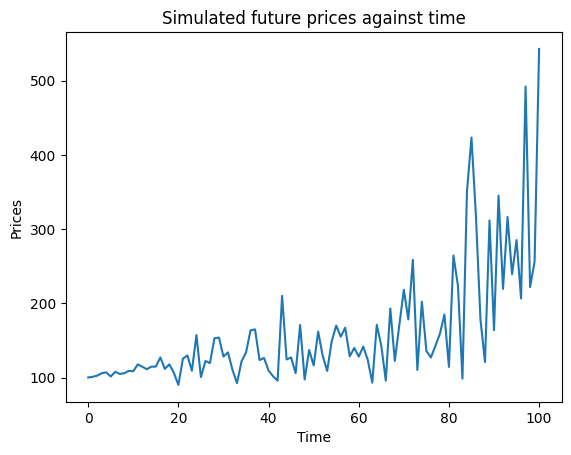

In [13]:
plot_prices(simulated_prices)

## Part 2

In [9]:
import datetime
from dateutil.relativedelta import relativedelta


In [10]:
class Bond:
    def __init__(self, effective_date, maturity_date, issuing_price, coupon):
        self.effective_date = effective_date
        self.maturity_date = maturity_date
        self.issuing_price = issuing_price
        self.coupon = coupon
        self.par = 1000
    
    def yield_to_maturiy(self):
        # par value = 1000
        par = 1000
        bp = 0.00001
        years = relativedelta(self.maturity_date, self.effective_date).years
        for i in range(10000):
            ytm = bp * i
            pv = sum([(par * self.coupon) / (1 + ytm) ** t for t in range(1, years+1)]) + (par / (1 + ytm) ** years)
            if abs(pv - self.issuing_price) < 1e-1:
                self.ytm = ytm
                return round(ytm, 5)
        raise Exception(f"Could not search the yield to maturity") 

    def modified_duration(self):
        if not self.ytm:
            raise Exception("The yield to maturity is not yet calculated. Please call the funtion yield_to_maturiy()")
        par = 1000
        years = relativedelta(self.maturity_date, self.effective_date).years
        MacD = (1 / self.issuing_price) * (sum([(par * self.coupon * t) / (1 + self.ytm) ** t for t in range(1, years+1)]) 
                                           + (par * years / (1 + self.ytm) ** years))
        return MacD / (1 + self.ytm)


In [11]:
start = datetime.datetime(2023,6,24,0,0,0,0)
end = datetime.datetime(2025,6,24,0,0,0,0)
bond1 = Bond(start, end, 950, 0.03)
bond1.yield_to_maturiy()

0.05711

In [12]:
bond1.modified_duration()

1.8638802609967249